**We used a percolation threshold equal to the first upward inflection point of the convex part of the sigmoid relationship between edge weight (X axis) and network size (Y axis) as an objective approach to filtering edges.** 

**There are two points, the inflection point and the intersection point of the tangent line of the inflection point with y= 0, which can be found by mathematical methods.** 

**It depends on your use case, you can choose whichever works best for you.** 

**This file shows the calculation of the Inflection point and the Intersection point of the Percolation Threshold Curve** 


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd

# path_to_data is the folder for all input and output of SynTwin, replace path_to_data to your path
# Percolation_threshold subfolder was created in previous step
path = 'path_to_data/'
percolation_folder = 'Percolation_threshold'
method_list = ['euclidean','manhattan','cosine','gower']

In [3]:
# the threshold we used, equal to the first upward inflection point of the convex part of the sigmoid relationship between edge weight (X axis) and network size (Y axis) as an objective approach to filtering edges
def get_threshold(method):
    if method == 'euclidean':
        threshold=2
    if method == 'manhattan':
        threshold=4
    if method == 'cosine':
        threshold=0.22 
    if method == 'gower':
        threshold=0.12  
    return threshold

In [ ]:
method = 'manhattan'
threshold_curve = pd.read_csv(path+percolation_folder+'/threshold_curve_'+method+'.csv', index_col=0)

### Inflection point

**fitting a sigmoid function to the data and calculating the second derivative. The inflection point is the point where the second derivative equals zero.**

In [12]:
import numpy as np
from scipy.optimize import curve_fit

# Define the sigmoidal (logistic) function
def sigmoid(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# Define your data points (x and y values)
x_data = threshold_curve['Dist'].values
y_data = threshold_curve['connections'].values

# normalize data to avoid runtime error
y_max = np.max(y_data)
y_min = np.min(y_data)
y_data_normalized = (y_data - y_min) / (y_max - y_min)

# Fit the sigmoidal curve to the data
params, covariance = curve_fit(sigmoid, x_data, y_data_normalized)

# Extract the fitted parameters
L, k, x0 = params
x0

9.700204267997488

In [13]:
# Find the inflection point of the sigmoid function
inflection_point = x0

In [14]:
y_predicted = sigmoid(x0, L, k, x0)
y_predicted * (y_max - y_min) + y_min

222501027.9296598

### Intersection point of the tangent line of the inflection point with y= 0
**After finding the inflection point, the derivative of the point is the slope of the tangent line. Then, we can find the intersection point of this tangent line with y=0**

In [15]:
def sigmoid_derivative(x, L, k, x0):
    return L * k * np.exp(k * (x - x0)) / ((1 + np.exp(k * (x - x0))) ** 2)

In [16]:
# Calculate the slope (m) of the tangent line at the inflection point
m = sigmoid_derivative(inflection_point, L, k, x0)

# Calculate the y-intercept (b) of the tangent line
# tangent line: y = m * x + b, --> b = y - m * x
b = sigmoid(inflection_point, L, k, x0) - m * inflection_point

# Find the x where the tangent line intersects with y = 0
# 0 = m * x + b --> x = -b / m
intersection_x = -b / m

# The intersection point is (intersection_x, 0)
print("Intersection Point: ({}, 0)".format(intersection_x))

Intersection Point: (5.554407304106349, 0)


## plot

<Figure size 1600x1000 with 0 Axes>

([<matplotlib.axis.XTick at 0x1499ed4b0>,
 [Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35'),
  Text(40.0, 0, '40'),
  Text(45.0, 0, '45'),
  Text(4.0, 0, '4')])

Text(0.5, 1.0, 'Threshold Curve - manhattan')

Text(0.5, 0, 'Distance')

Text(0, 0.5, 'Num Connections')

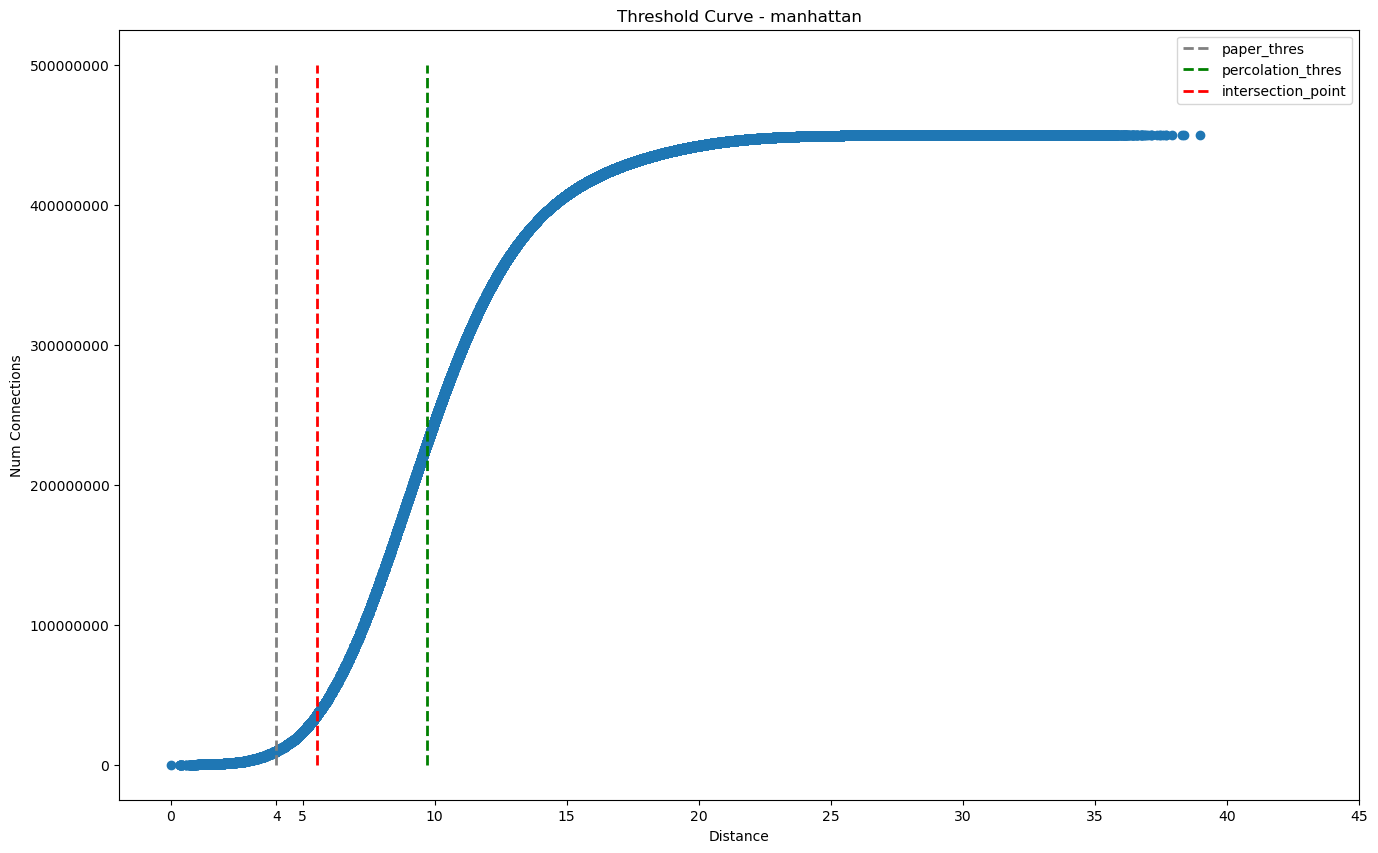

In [17]:
#import numpy as np
import matplotlib.pyplot as plt

# plot
plt.figure(figsize=(16,10))
plt.scatter(threshold_curve['Dist'],threshold_curve['connections'])
threshold=get_threshold(method)          
plt.vlines(x=[threshold], ymin=0, ymax=500000000, colors='grey', ls='--', lw=2, label='paper_thres')
plt.vlines(x=[9.7], ymin=0, ymax=500000000, colors='green', ls='--', lw=2, label='percolation_thres')
plt.vlines(x=[5.5544], ymin=0, ymax=500000000, colors='red', ls='--', lw=2, label='intersection_point')
if method == 'cosine':
    plt.xticks(list(plt.xticks()[0])[3:] + [0,threshold])
else: 
    plt.xticks(list(plt.xticks()[0])[1:] + [threshold])
plt.ticklabel_format(style='plain')
plt.title("Threshold Curve - "+method)
plt.xlabel("Distance")
plt.ylabel("Num Connections")
plt.legend(loc='upper right')
plt.show()